<!-- # Data generation

> Collect random rollouts from the MeltingPot environments and save them to disk for later use in training and evaluation. -->

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp data.generate_data

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastcore import *
from fastcore.utils import *

<!-- ## Melting Pot -->

## Melting Pot

In [ ]:
# from shimmy import MeltingPotCompatibilityV0
# from shimmy.utils.meltingpot import load_meltingpot

# env = load_meltingpot("collaborative_cooking__circuit")
# env = MeltingPotCompatibilityV0(env, render_mode="rgb_array")
# observations = env.reset()
# lst_agents = []
# i =0
# while env.agents:
#     actions = {agent: env.action_space(agent).sample() for agent in env.agents}
#     observations, rewards, terminations, truncations, infos = env.step(actions)
#     lst_agents.append(observations['player_0']['RGB'])
#     if i == 10: 
#         break
#     i += 1

# env.close()

In [ ]:
# #| export

# from shimmy import MeltingPotCompatibilityV0
# from shimmy.utils.meltingpot import load_meltingpot
# import numpy as np

# env = load_meltingpot("collaborative_cooking__circuit")
# env = MeltingPotCompatibilityV0(env, render_mode="rgb_array")

# seq_len = 1000
# rollouts = 10
# data_dir = './data'
# noise_type = 'brown'



# for i in range(rollouts):
#     # reset environment
#     reset_out = env.reset()
#     if isinstance(reset_out, tuple):  # unpack tuple (obs, info)
#         observations, infos = reset_out
#     else:
#         observations = reset_out
#         infos = None

#     if noise_type == 'white':
#         for agent in env.agents:
#             a_rollout[agent] = [env.action_space(agent).sample() for _ in range(seq_len)]
    
#     elif noise_type == 'brown':
#         for agent in env.agents:
#             a_rollout[agent] = sample_continuous_policy(env.action_space(agent), seq_len, 1. / 50)

#     s_rollout = []
#     r_rollout = []
#     d_rollout = []

#     t = 0
#     while True:

#         actions = {}

#         action = a_rollout[t]
#         t += 1

#         for agent in env.agents:
#             action = env.action_space(agent).sample()
#             actions[agent] = action

#             # access observation dict correctly
#             obs = observations[agent]
#             data[agent]["obs"].append(obs)
#             data[agent]["actions"].append(action)

#         s, r, terminated, truncated, info = env.step(action)
#         done = terminated or truncated

#         s_rollout += [s]
#         r_rollout += [r]
#         d_rollout += [done]

#         if done:
#             print("> End of rollout {}, {} frames...".format(i, len(s_rollout)))
#             np.savez(join(data_dir, 'rollout_{}'.format(i)),
#                         observations=np.array(s_rollout),
#                         rewards=np.array(r_rollout),
#                         actions=np.array(a_rollout),
#                         terminals=np.array(d_rollout))
#             break




        

#         # perform step
#         step_out = env.step(actions)
#         if len(step_out) == 5:
#             observations, rewards, terminations, truncations, infos = step_out
#         else:
#             observations, rewards, terminations, truncations = step_out
#             infos = None

#         # store rewards
#         for agent, r in rewards.items():
#             data[agent]["rewards"].append(r)

# env.close()

# # 5. Convert to numpy arrays
# for agent, d in data.items():
#     d["obs"] = np.array(d["obs"])
#     d["actions"] = np.array(d["actions"])
#     d["rewards"] = np.array(d["rewards"])

# # 6. Print summary
# for agent, d in data.items():
#     print(f"{agent}: {len(d['obs'])} steps, avg reward = {np.mean(d['rewards']):.3f}")


In [ ]:
# img = data['player_0']['obs'][20]['RGB'].shape
# import matplotlib.pyplot as plt
# plt.imshow(data['player_0']['obs'][50]['RGB'])
# plt.axis('off')
# plt.show()


In [ ]:
# data['player_0']['obs'][0].keys()

In [ ]:
# data['player_0'].keys()

In [ ]:
# import numpy as np
# import math
# import os
# from shimmy import MeltingPotCompatibilityV0
# from shimmy.utils.meltingpot import load_meltingpot


# def sample_continuous_policy(action_space, seq_len, dt):
#     """Sample a continuous Brownian motion policy for Box action spaces."""
#     actions = [action_space.sample()]
#     for _ in range(seq_len - 1):
#         daction_dt = np.random.randn(*actions[-1].shape)
#         actions.append(
#             np.clip(actions[-1] + math.sqrt(dt) * daction_dt,
#                     action_space.low, action_space.high))
#     return actions


# def sample_discrete_policy(action_space, seq_len, dt):
#     """Sample a Brownian-like random walk over discrete actions."""
#     current_action = action_space.sample()
#     actions = [current_action]
#     for _ in range(seq_len - 1):
#         if np.random.rand() < 1 - dt * 10:  # stay same most of the time
#             next_action = current_action
#         else:
#             next_action = action_space.sample()
#         actions.append(next_action)
#         current_action = next_action
#     return actions


# def generate_data_meltingpot(env_name="collaborative_cooking__circuit",
#                              rollouts=3,
#                              seq_len=1000,
#                              dt=1./50,
#                              data_dir='../data',
#                              noise_type='brown'):
#     """Generate and save rollouts from a MeltingPot environment (Gym-style)."""
#     assert os.path.exists(data_dir), "The data directory does not exist..."

#     raw_env = load_meltingpot(env_name)
#     env = MeltingPotCompatibilityV0(raw_env, render_mode="rgb_array")

#     for rollout_idx in range(rollouts):
#         print(f"\nStarting rollout {rollout_idx}...")
#         obs, info = env.reset()

#         # Initialize per-agent data containers
#         agents = list(obs.keys())
#         agent_data = {
#             agent: {"observations": [], "rewards": [], "actions": [], "terminations": []}
#             for agent in agents
#         }

#         # Prepare per-agent action sequences
#         policies = {}
#         for agent in agents:
#             a_space = env.action_space(agent)
#             if hasattr(a_space, "low"):  # Box space
#                 policies[agent] = sample_continuous_policy(a_space, seq_len, dt)
#             else:  # Discrete space
#                 policies[agent] = sample_discrete_policy(a_space, seq_len, dt)

#         for t in range(seq_len):
#             # Record observations
#             for agent in agents:
#                 agent_data[agent]["observations"].append(obs[agent])

#             # Select next actions for all agents
#             actions = {agent: policies[agent][t] for agent in agents}

#             # Step environment
#             obs, rewards, terminated, truncated, info = env.step(actions)

#             # Record rewards and terminations
#             for agent in agents:
#                 agent_data[agent]["rewards"].append(rewards[agent])
#                 done = terminated[agent] or truncated[agent]
#                 agent_data[agent]["terminations"].append(done)
#                 agent_data[agent]["actions"].append(actions[agent])

#             # If all agents are done → break early
#             if all(terminated.values()) or all(truncated.values()):
#                 print(f"> Rollout {rollout_idx} ended early at step {t}")
#                 break

#         # Save rollout to disk
#         save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.npz")
#         # Merge per-agent arrays into a single dict
#         save_dict = {}
#         for ag in agents:
#             save_dict[f"{ag}_observations"] = np.array(agent_data[ag]["observations"])
#             save_dict[f"{ag}_rewards"] = np.array(agent_data[ag]["rewards"])
#             save_dict[f"{ag}_actions"] = np.array(agent_data[ag]["actions"])
#             save_dict[f"{ag}_terminations"] = np.array(agent_data[ag]["terminations"])

#         np.savez_compressed(save_path, **save_dict)
#         print(f"> Saved rollout {rollout_idx} to {save_path}")

#     env.close()


In [ ]:
# generate_data_meltingpot(rollouts= 10000)

In [ ]:
# import numpy as np
# rollout_0 = np.load('../data/rollout_1.npz', allow_pickle=True)
# print(list(rollout_0.keys()))

In [ ]:
# rollout_0['player_0_observations'].shape

In [ ]:
# rollout_0['player_1_observations'][0].keys()

In [ ]:
# rollout_0['player_1_observations'][200]['COLLECTIVE_REWARD'].

In [ ]:
# seq_imgs = [rollout_0['player_0_observations'][i]['RGB'] for i in range(10)]
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 10, figsize=(16, 8))
# for i, img in enumerate(seq_imgs):
#     axs[i].imshow(img)
#     axs[i].axis('off')
# plt.savefig('seq_imgs.pdf')
# plt.show()


In [ ]:
# img = rollout_0['player_1_observations'][-1]['RGB']
# import matplotlib.pyplot as plt
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [ ]:
# img.shape

In [ ]:
# import torch
# tensor_img = torch.tensor(img)
# tensor_img.view(3, 40, 40).shape

In [ ]:
# [rollout_0['player_0_rewards'][i] for i in range(len(rollout_0['player_0_rewards'])) if rollout_0['player_0_rewards'][i] != 0]

In [ ]:
# [rollout_0['player_1_observations'][i]['COLLECTIVE_REWARD'] for i in range(len(rollout_0['player_0_rewards'])) if rollout_0['player_1_observations'][i]['COLLECTIVE_REWARD'] != 0]
# # rollout_0['player_1_observations'][200]['COLLECTIVE_REWARD']

In [ ]:
# from meltingpot import substrate
# env = substrate.build("collaborative_cooking__circuit", roles=["player_0", "player_1"])



## MarlGrid V2

In [ ]:
import numpy as np
import os
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config


def generate_data_marl_grid(env_name="marl_grid",
                            rollouts=3,
                            seed_steps=4000,
                            seq_len=50,
                            data_dir='../datasets/marl_grid_data'):
    """Generate and save full rollouts from a MarlGrid environment.
       Later, training code samples subsequences uniformly inside each rollout.
    """

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    def create_env():
        config.env_cfg.seed = np.random.randint(0, 10000)
        config.env_cfg.max_steps = seed_steps
        
        env = make_env(config.env_cfg)
        agents = [f'agent_{i}' for i in range(config.env_cfg.num_agents)]
        return env, agents

    for rollout_idx in range(rollouts):

        print(f"\nStarting rollout {rollout_idx}...")
        env, agents = create_env()

        # Fresh buffers for each rollout
        agent_data = {ag: {"obs": [], "rew": [], "act": [], "term": [], "info": []} for ag in agents}

        obs = env.reset()
        for ag in agents:
            agent_data[ag]["obs"].append(obs[ag])
            
        episode_len = 0

        for t in range(seed_steps):

            actions = {ag: env.action_space.sample() for ag in agents}
            obs, rew, done, info = env.step(actions)

            for ag in agents:
                agent_data[ag]["obs"].append(obs[ag])
                agent_data[ag]["rew"].append(rew[ag])
                agent_data[ag]["act"].append(actions[ag])
                agent_data[ag]["info"].append(info[ag])
                # agent_data[ag]["term"].append(done['__all__'])

            episode_len += 1
            if done['__all__']:
                print(f"> Rollout {rollout_idx} ended early at step {t}")
                break

        save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.npz")
        save_dict = {"episode_len": episode_len}

        for ag in agents:
            save_dict[f"{ag}_obs"] = np.array(agent_data[ag]["obs"])
            save_dict[f"{ag}_rew"] = np.array(agent_data[ag]["rew"])
            save_dict[f"{ag}_act"] = np.array(agent_data[ag]["act"])
            save_dict[f"{ag}_info"] = np.array(agent_data[ag]["info"])
            # save_dict[f"{ag}_term"] = np.array(agent_data[ag]["term"])

        np.savez_compressed(save_path, **save_dict)
        print(f"> Saved rollout {rollout_idx} to {save_path}")

        env.close()


### Data generation code

In [ ]:
# generate_data_marl_grid(rollouts= int(1e6))

In [ ]:
#| hide
import numpy as np
idx = np.random.randint(0, 10000)
rollout = np.load(f'../datasets/marl_grid_data/rollout_{idx}.npz', allow_pickle=True)
print(list(rollout.keys()))

['episode_len', 'agent_0_obs', 'agent_0_rew', 'agent_0_act', 'agent_0_info', 'agent_1_obs', 'agent_1_rew', 'agent_1_act', 'agent_1_info']


In [ ]:
rollout['episode_len']

array(799)

### test

In [ ]:
generate_data_marl_grid(rollouts= 1, seed_steps = 100,data_dir='../datasets/test_marl_data')


Starting rollout 0...
> Rollout 0 ended early at step 99
> Saved rollout 0 to ../datasets/test_marl_data/rollout_0.npz


In [ ]:
import numpy as np
idx = 0
rollout = np.load(f'../datasets/test_marl_data/rollout_{idx}.npz', allow_pickle=True)
print(list(rollout.keys()))

['episode_len', 'agent_0_obs', 'agent_0_rew', 'agent_0_act', 'agent_0_info', 'agent_1_obs', 'agent_1_rew', 'agent_1_act', 'agent_1_info']


In [ ]:
rollout['agent_0_obs'].shape

(101,)

In [ ]:
rollout['agent_0_obs'][0].keys()

dict_keys(['pov', 'selfpos', 'orientation', 'identity'])

In [ ]:
rollout['agent_0_obs'][0]['pov'].shape

(42, 42, 3)

In [ ]:
rollout['agent_0_obs'][10]['orientation']

1

In [ ]:
# act_str = ["Right", "Down", "Left", "Up", "Done", "Toggle", "Pickup", "Drop"]
# def plot_two_ing_side_by_side(img1, img2):
#     # img1 = unnormalize(img1)
#     # img2 = unnormalize(img2)

#     import cv2
#     import matplotlib.pyplot as plt
#     def show_grid(img, GRID = 7, CELL = 6):
#         if not CELL:
#             CELL = img.shape[0] // GRID
        
#         vis = img.copy()
#         for i in range(1, GRID):
#             cv2.line(vis, (i*CELL, 0), (i*CELL, 42), (255,255,255), 1)
#             cv2.line(vis, (0, i*CELL), (42, i*CELL), (255,255,255), 1)
#         return vis
    
#     fig, axs = plt.subplots(1, 2)

#     vis1 = show_grid(img1, GRID=7, CELL=6)
#     vis2 = show_grid(img2, GRID=7, CELL=6)

#     axs[0].imshow(vis1)
#     axs[0].set_title('Image $t$')

#     axs[1].imshow(vis2)
#     axs[1].set_title('Image $t+1$')
#     plt.savefig("example2.png")
#     plt.show()

# indx = np.random.randint(0, len(rollout['agent_0_obs'])-2)
# print(indx)
# img1 = rollout['agent_0_obs'][indx]['pov']
# # img1 = np.transpose(img1, (1, 2, 0))
# print(f"Action taken: {act_str[rollout['agent_0_act'][indx]]}")
# img2 = rollout['agent_0_obs'][indx + 1]['pov']
# # img2 = np.transpose(img2, (1, 2, 0))
# # print(img2.dtype)
# plot_two_ing_side_by_side(img1.astype(np.uint8), img2.astype(np.uint8))

In [ ]:
# import numpy as np
# actions = np.load("../mains/actions.npy", allow_pickle=True)
# directions = np.load("../mains/directions.npy", allow_pickle=True)

In [ ]:
# right, down, left, up
# if action in {0, 1, 2, 3}

In [ ]:
# [(i, directions[i]) for i in range(1, 10)]

[(1, {'agent_0': (0, array([2, 7])), 'agent_1': (0, array([2, 7]))}),
 (2, {'agent_0': (1, array([2, 7])), 'agent_1': (0, array([3, 7]))}),
 (3, {'agent_0': (2, array([2, 7])), 'agent_1': (0, array([3, 7]))}),
 (4, {'agent_0': (2, array([2, 7])), 'agent_1': (0, array([3, 7]))}),
 (5, {'agent_0': (1, array([2, 7])), 'agent_1': (3, array([3, 7]))}),
 (6, {'agent_0': (0, array([2, 7])), 'agent_1': (3, array([3, 7]))}),
 (7, {'agent_0': (1, array([2, 7])), 'agent_1': (0, array([3, 7]))}),
 (8, {'agent_0': (1, array([2, 7])), 'agent_1': (3, array([3, 7]))}),
 (9, {'agent_0': (1, array([2, 8])), 'agent_1': (3, array([3, 7]))})]

In [ ]:
# [(i, actions[i]) for i in range(10)]

[(0, {'agent_0': 'Forward', 'agent_1': 'Done'}),
 (1, {'agent_0': 'Right', 'agent_1': 'Forward'}),
 (2, {'agent_0': 'Right', 'agent_1': 'Done'}),
 (3, {'agent_0': 'Done', 'agent_1': 'Done'}),
 (4, {'agent_0': 'Left', 'agent_1': 'Left'}),
 (5, {'agent_0': 'Left', 'agent_1': 'Done'}),
 (6, {'agent_0': 'Right', 'agent_1': 'Right'}),
 (7, {'agent_0': 'Done', 'agent_1': 'Left'}),
 (8, {'agent_0': 'Forward', 'agent_1': 'Done'}),
 (9, {'agent_0': 'Left', 'agent_1': 'Left'})]

### Minigrid test semantics action

In [ ]:
action_mapping = {
    0: "Left",
    1: "Right",
    2: "Forward",
    3: "Pickup",
    4: "Drop",
    5: "Toggle",
    6: "Done"
    }

In [ ]:
import numpy as np
import os

import gymnasium as gym
import gymnasium as gym
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper, RGBImgObsWrapper
# env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="human")

def generate_data_mini_grid(env_name="mini_grid",
                            rollouts=3,
                            seed_steps=200,
                            seq_len=50,
                            data_dir='../test_marl_data'):
    """Generate and save full rollouts from a MarlGrid environment.
       Later, training code samples subsequences uniformly inside each rollout.
    """

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    def create_env():
        # env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
        env = gym.make('MiniGrid-Empty-16x16-v0', render_mode="rgb_array")
        # env = RGBImgPartialObsWrapper(env) # Get pixel observations
        env = RGBImgObsWrapper(env) # Get rid of the 'mission' field
        
        return env

    for rollout_idx in range(1, rollouts):

        print(f"\nStarting rollout {rollout_idx}...")
        env = create_env()

        # Fresh buffers for each rollout
        agent_data = {"obs": [], "rew": [], "act": []}

        obs, _ = env.reset() # This now produces an RGB tensor only
        # print(obs.shape)
        agent_data["obs"].append(obs)
            
        episode_len = 0

        for t in range(seed_steps):

            action = env.action_space.sample()
            obs, rew, terminated, truncated, info = env.step(action)
            # print(action_mapping[action])

            agent_data["obs"].append(obs)
            agent_data["rew"].append(rew)
            agent_data["act"].append(action)

            episode_len += 1
            if terminated or truncated:
                print(f"> Rollout {rollout_idx} ended early at step {t}")
                break

        save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.npz")
        save_dict = {"episode_len": episode_len}

        # print(len(agent_data["obs"]))
        # import ipdb; ipdb.set_trace()
        save_dict["obs"] = np.array(agent_data["obs"])
        save_dict["rew"] = np.array(agent_data["rew"])
        save_dict["act"] = np.array(agent_data["act"])

        np.savez_compressed(save_path, **save_dict)
        print(f"> Saved rollout {rollout_idx} to {save_path}")

        env.close()


In [ ]:
generate_data_mini_grid(rollouts= 2, data_dir='../datasets/mini_grid_data')


Starting rollout 1...


> Saved rollout 1 to ../datasets/mini_grid_data/rollout_1.npz


In [ ]:
# load data
import numpy as np
idx = 1
rollout = np.load(f'../datasets/mini_grid_data/rollout_{idx}.npz', allow_pickle=True)
print(list(rollout.keys()))

['episode_len', 'obs', 'rew', 'act']


In [ ]:
# act_str = ["Right", "Down", "Left", "Up", "Done", "Toggle", "Pickup", "Drop"]
# def plot_two_ing_side_by_side(img1, img2):
#     import cv2
#     import matplotlib.pyplot as plt
#     def show_grid(img, GRID = 7, CELL = 6):
#         if not CELL:
#             CELL = img.shape[0] // GRID
        
#         vis = img.copy()
#         for i in range(1, GRID):
#             cv2.line(vis, (i*CELL, 0), (i*CELL, 42), (255,255,255), 1)
#             cv2.line(vis, (0, i*CELL), (42, i*CELL), (255,255,255), 1)
#         return vis
    
#     fig, axs = plt.subplots(1, 2)

#     vis1 = show_grid(img1, GRID=7, CELL=6)
#     vis2 = show_grid(img2, GRID=7, CELL=6)
#     axs[0].imshow(vis1)
#     axs[0].set_title('Image $t$')

#     axs[1].imshow(vis2)
#     axs[1].set_title('Image $t+1$')
#     plt.savefig("example2.png")
#     plt.show()

# indx = np.random.randint(0, len(rollout['obs'])-2)
# print(indx)

# img1 = rollout['obs'][indx]
# # print(f"Action taken: {act_str[rollout['act'][indx]]}")
# img2 = rollout['obs'][indx + 1]

# plot_two_ing_side_by_side(img1, img2)

In [ ]:
rollout['obs'][0]['image'].shape

(128, 128, 3)

In [ ]:
# def plot_two_ing_side_by_side(img1, img2):
#     import cv2
#     import matplotlib.pyplot as plt
#     import numpy as np

#     def show_grid(img, GRID=7):
#         # Get actual image dimensions
#         h, w = img.shape[:2]
#         cell_h = h // GRID
#         cell_w = w // GRID
        
#         # Ensure we work on a copy to avoid modifying original data
#         vis = img.copy()
        
#         # Draw lines based on the dynamic height (h) and width (w)
#         for i in range(1, GRID):
#             # Vertical lines: (x, y) coordinates
#             cv2.line(vis, (i * cell_w, 0), (i * cell_w, h), (255, 255, 255), 1)
#             # Horizontal lines
#             cv2.line(vis, (0, i * cell_h), (w, i * cell_h), (255, 255, 255), 1)
#         return vis
    
#     fig, axs = plt.subplots(1, 2)

#     # The function now automatically handles the 56x56 size
#     vis1 = show_grid(img1, GRID=7)
#     vis2 = show_grid(img2, GRID=7)
    
#     axs[0].imshow(vis1)
#     axs[0].set_title('Image $t$')
#     axs[0].axis('off') # Optional: hides the pixel axis

#     axs[1].imshow(vis2)
#     axs[1].set_title('Image $t+1$')
#     axs[1].axis('off')

#     plt.savefig("example2.png", bbox_inches='tight')
#     plt.show()

# indx = np.random.randint(0, len(rollout['obs'])-2)
# print(indx)

# img1 = rollout['obs'][indx]['image']
# # print(f"Action taken: {act_str[rollout['act'][indx]]}")
# print(action_mapping[rollout['act'][indx]])
# img2 = rollout['obs'][indx + 1]['image']

# plot_two_ing_side_by_side(img1, img2)

In [ ]:
action_mapping = {
    0: "Left",
    1: "Right",
    2: "Forward",
    3: "Pickup",
    4: "Drop",
    5: "Toggle",
    6: "Done"
    }

In [ ]:
# make a gif of sequence of images
import imageio
def make_gif_from_images(image_sequence, gif_name='sequence.gif', duration=0.2):
    frames = []
    for img in image_sequence:
        frames.append(img)
    imageio.mimsave(gif_name, frames, duration=duration)

# indx = np.random.randint(0, len(rollout['obs'])-10)
# print(indx)
img_sequence = [rollout['obs'][i]['image'] for i in range(len(rollout['obs']))]
make_gif_from_images(img_sequence, gif_name='mini_grid_sequence.gif', duration=10)


KeyboardInterrupt: 

In [ ]:
# play gif
from IPython.display import Image
act_sequence = [action_mapping[rollout['act'][i]] for i in range(len(rollout['act']))]
print(act_sequence)
Image(filename='mini_grid_sequence.gif', width=400, height=400)

In [ ]:
act_sequence = [action_mapping[rollout['act'][i]] for i in range(len(rollout['act']))]

In [ ]:
act_sequence

In [ ]:
# indx = 944#np.random.randint(0, len(img_sequence)-2)
# print(indx)

# img1 = img_sequence[indx]
# print(act_sequence[indx])
# img2 = img_sequence[indx + 1]

# plot_two_ing_side_by_side(img1, img2)

In [ ]:
361

## MarlGrid V3

In [ ]:
#| hide
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config
from mawm.envs.marl_grid.wrappers import GridRecorder
import numpy as np

config.env_cfg.seed = np.random.randint(0, 10000)
config.env_cfg.max_steps = 100

env = make_env(config.env_cfg)


In [ ]:
#| export
def normalize(img):
    return (img - img.min()) / (img.max() - img.min())

# img = obs['agent_0']['pov']


In [ ]:
import copy
import os
import numpy as np
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config
def collect_one_rollout_numpy(args):
    rollout_idx, seed, seed_steps, data_dir = args

    cfg = copy.deepcopy(config)
    cfg.env_cfg.seed = int(seed)
    cfg.env_cfg.max_steps = seed_steps

    env = make_env(cfg.env_cfg)
    agents = [f"agent_{i}" for i in range(cfg.env_cfg.num_agents)]
    obs = env.reset()
    goal_pos = obs["global"]["goal_pos"]
    goal_obs = np.array([
        env.get_goal(env.agents[i], goal_pos)[0]
        for i in range(config.env_cfg.num_agents)
    ])
    
    layout = env.get_layout(render_kwargs={"tile_size":11})

    agent_data = {
        ag: {k: [] for k in ["obs", "act", "next_obs", "selfpos", "orientation", "sees_goal", "rew", "done"]}
        for ag in agents
    }

    episode_len = 0
    success = False
    success_at = -1

    for t in range(seed_steps):
        current_obs = obs
        actions = {ag: env.action_space.sample() for ag in agents}
        obs, rew, done, info = env.step(actions)
        
        for ag in agents:
            agent_data[ag]["obs"].append(current_obs[ag]["pov"])# list of ndarrays
            agent_data[ag]["act"].append(actions[ag]) # actions are list of int64
            agent_data[ag]["next_obs"].append(obs[ag]["pov"])# list of ndarrays

            agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])# list of ndarrays
            agent_data[ag]["orientation"].append(obs[ag]["orientation"])# list of int64
            agent_data[ag]["sees_goal"].append(info[ag]["sees_goal"])# list of np.int64

            agent_data[ag]["rew"].append(rew[ag])# list of float64
            agent_data[ag]["done"].append(info[ag]["done"])# list of bools

        episode_len += 1
        if done["__all__"]:
            success = all(info[ag]["done"] for ag in agents)
            success_at = t if success else -1
            break

    env.close()
    
    save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.npz")
    os.makedirs(data_dir, exist_ok=True)
    save_dict = {}

    for ag in agents:
        save_dict[f"{ag}_obs"] = np.stack(agent_data[ag]["obs"]).astype(np.uint8)
        save_dict[f"{ag}_act"] = np.asarray(agent_data[ag]["act"])
        save_dict[f"{ag}_next_obs"] = np.stack(agent_data[ag]["next_obs"]).astype(np.uint8)
        save_dict[f"{ag}_done"] = np.asarray(agent_data[ag]["done"])

        save_dict[f"{ag}_rew"] = np.asarray(agent_data[ag]["rew"])
        save_dict[f"{ag}_selfpos"] = np.stack(agent_data[ag]["selfpos"])
        save_dict[f"{ag}_orientation"] = np.asarray(agent_data[ag]["orientation"])
        save_dict[f"{ag}_sees_goal"] = np.asarray(agent_data[ag]["sees_goal"])

    save_dict['goal_pos'] = goal_pos
    save_dict['episode_len'] = episode_len
    save_dict['success'] = success
    save_dict['success_at'] = success_at
    save_dict['seed'] = config.env_cfg.seed
    save_dict['layout'] = layout
    save_dict['goal_obs'] = goal_obs


    np.savez_compressed(save_path, **save_dict)
    print(f"> Saved rollout {rollout_idx} to {save_path}")
    
    return rollout_idx
    


In [ ]:
for i in range(10):
    seed = i % 5
    collect_one_rollout_numpy((i, seed, 3000, './data_test/'))

> Saved rollout 0 to ./data_test/rollout_0.npz
> Saved rollout 1 to ./data_test/rollout_1.npz
> Saved rollout 2 to ./data_test/rollout_2.npz
> Saved rollout 3 to ./data_test/rollout_3.npz
> Saved rollout 4 to ./data_test/rollout_4.npz
> Saved rollout 5 to ./data_test/rollout_5.npz
> Saved rollout 6 to ./data_test/rollout_6.npz
> Saved rollout 7 to ./data_test/rollout_7.npz
> Saved rollout 8 to ./data_test/rollout_8.npz
> Saved rollout 9 to ./data_test/rollout_9.npz


In [ ]:
#| hide
import numpy as np
rollout = np.load(f'./data_test/rollout_0.npz', allow_pickle=True)
print(list(rollout.keys()))
rollout['agent_0_obs'].shape, rollout['agent_0_next_obs'].shape, rollout['agent_0_act'].shape

['agent_0_obs', 'agent_0_act', 'agent_0_next_obs', 'agent_0_done', 'agent_0_rew', 'agent_0_selfpos', 'agent_0_orientation', 'agent_0_sees_goal', 'agent_1_obs', 'agent_1_act', 'agent_1_next_obs', 'agent_1_done', 'agent_1_rew', 'agent_1_selfpos', 'agent_1_orientation', 'agent_1_sees_goal', 'goal_pos', 'episode_len', 'success', 'success_at', 'seed', 'layout', 'goal_obs']


((1000, 42, 42, 3), (1000, 42, 42, 3), (1000,))

In [ ]:
rollout['episode_len'].item()

1000

In [ ]:
rollout['agent_0_obs'][0].dtype

dtype('uint8')

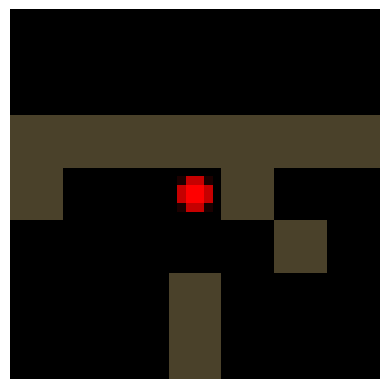

In [ ]:
#| hide
import matplotlib.pyplot as plt
img = rollout['agent_0_obs'][20]
# normalize = lambda img: (img - img.min()) / (img.max() - img.min())
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
rollout['agent_0_obs'].shape

(100, 42, 42, 3)

['Done', 'Right', 'Up', 'Done', 'Up']


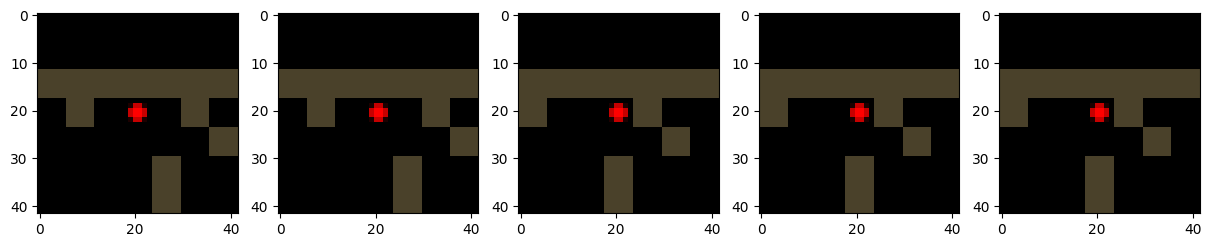

In [ ]:
#| hide
action_mapping = {
    0: "Right",
    1: "Down",
    2: "Left",
    3: "Up",
    4: "Done",
    }
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(15,6))
idx = 0
ds = rollout
for i in range(15, 20):
    obs = ds['agent_0_obs'][i]
    next_obs = ds['agent_0_next_obs'][i]
    ax = axs[i - 15]
    ax.imshow(obs)
    # ax.set_title(f"Step {ds['transition_idx'][i]}, R{ds['rollout_idx'][i]}")
print([action_mapping[a] for a in ds['agent_0_act'][15:20]])
plt.savefig('example_rollout_steps.png')
plt.show()

In [ ]:
#| hide
import numpy as np
list_itms = [np.random.rand(42, 42, 3) for _ in range(5)]
np.stack(list_itms).shape

(5, 42, 42, 3)

In [ ]:
#| export
import numpy as np
import os
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config

def generate_data_marl_grid_np(
    rollouts=3,
    seed_steps=4000,
    data_dir='../marl_grid_data',
    save_metadata=True,      # NEW: save environment metadata
    env_name="marl_grid"
):
    """Generate and save full rollouts from a MarlGrid environment."""
    
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    def create_env():
        config.env_cfg.seed = np.random.randint(0, 5) # use only small set of envs for training.
        config.env_cfg.max_steps = seed_steps
        env = make_env(config.env_cfg)
        agents = [f'agent_{i}' for i in range(config.env_cfg.num_agents)]
        return env, agents
    
    # Save config metadata once
    if save_metadata:
        meta_path = os.path.join(data_dir, "metadata.npz")
        np.savez_compressed(meta_path, 
                          grid_size=config.env_cfg.grid_size,
                          num_agents=config.env_cfg.num_agents,
                          max_steps=seed_steps,
                          view_size=config.env_cfg.view_size)
    
    for rollout_idx in range(rollouts):
        print(f"\nStarting rollout {rollout_idx}...")
        env, agents = create_env()
        
        # Fresh buffers for each rollout
        agent_data = {
            ag: {
                "obs":  [], 
                "selfpos": [], 
                "orientation": [],
                "sees_goal": [],
                "rew":  [], 
                "act":  [], 
                "done": [],  # Per-agent done status
            } for ag in agents
        }
        
        
        obs = env.reset()
        success = False
        success_at = -1
        goal_pos = obs['global']['goal_pos']
        # import ipdb; ipdb.set_trace()
        goal_obs = np.array([env.get_goal(env.agents[i], goal_pos)[0] for i in range(config.env_cfg.num_agents)])
        
        # Store initial observations
        for idx, ag in enumerate(agents):
            agent_data[ag]["obs"].append(obs[ag]['pov'])
            agent_data[ag]["selfpos"].append(obs[ag]['selfpos'])
            agent_data[ag]["orientation"].append(obs[ag]['orientation'])
            agent_data[ag]["sees_goal"].append(obs["global"]['sees_goal'][idx])
            agent_data[ag]["done"].append(False)  # Initial done status is False
        
        
        
        episode_len = 0
        
        for t in range(seed_steps):
            actions = {ag: env.action_space.sample() for ag in agents}
            obs, rew, done, info = env.step(actions)
            
            for ag in agents:
                agent_data[ag]["obs"].append(obs[ag]['pov'])
                agent_data[ag]["selfpos"].append(obs[ag]['selfpos'])
                agent_data[ag]["orientation"].append(obs[ag]['orientation'])
                agent_data[ag]["sees_goal"].append(info[ag]['sees_goal'])

                agent_data[ag]["rew"].append(rew[ag])
                agent_data[ag]["act"].append(actions[ag])
                agent_data[ag]["done"].append(info[ag]['done'])

                
            
            episode_len += 1
            
            if done['__all__']:
                success = True if all(info[ag]['done'] for ag in agents) else False
                success_at = t if success else -1
                print(f"> Rollout {rollout_idx} ended at step {t} (goal reached or timeout)")
                break
        
        # Save rollout
        save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.npz")
        save_dict = {
            "episode_len": episode_len,
            "rng_state": env.np_random.bit_generator.state['state']['state'],  # Save RNG state for reproducibility
            "seed": config.env_cfg.seed,
            "goal_pos": goal_pos,
            "goal_obs": goal_obs,
            "success": success,
            "success_at": success_at
        }
        final_dict = {
            "global": np.array([save_dict]),
        }

        for agent in agents:
            final_dict[agent] = {
                "obs": np.stack(agent_data[agent]["obs"]),
                "selfpos": np.stack(agent_data[agent]["selfpos"]),
                "orientation": np.stack(agent_data[agent]["orientation"]),
                "sees_goal": np.stack(agent_data[agent]["sees_goal"]),

                "act": np.stack(agent_data[agent]["act"]),
                "rew": np.stack(agent_data[agent]["rew"]),
                "done": np.stack(agent_data[agent]["done"]),
            }
            print(np.stack(agent_data[agent]["obs"]).shape)
        
        
            
        np.savez_compressed(save_path, **final_dict)
        print(f"> Saved rollout {rollout_idx} ({episode_len} steps) to {save_path}")
        
        env.close()
    
    print(f"\nData generation complete! {rollouts} rollouts saved to {data_dir}")

In [ ]:
#| export
import numpy as np
import os
import h5py
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config


def generate_data_marl_grid_h52(
    rollouts=3,
    seed_steps=4000,
    data_dir="../marl_grid_data",
    env_name="marl_grid"
):

    os.makedirs(data_dir, exist_ok=True)

    def create_env():
        config.env_cfg.seed = np.random.randint(0, 5)
        config.env_cfg.max_steps = seed_steps
        env = make_env(config.env_cfg)
        agents = [f"agent_{i}" for i in range(config.env_cfg.num_agents)]
        return env, agents

    # ---- Save metadata ONCE ----
    meta_path = os.path.join(data_dir, "metadata.h5")
    if not os.path.exists(meta_path):
        with h5py.File(meta_path, "w") as f:
            f.attrs["grid_size"] = config.env_cfg.grid_size
            f.attrs["num_agents"] = config.env_cfg.num_agents
            f.attrs["max_steps"] = seed_steps
            f.attrs["view_size"] = config.env_cfg.view_size

    for rollout_idx in range(rollouts):
        print(f"\nStarting rollout {rollout_idx}...")

        env, agents = create_env()
        obs = env.reset()

        goal_pos = obs["global"]["goal_pos"]
        goal_obs = np.array(
            [env.get_goal(env.agents[i], goal_pos)[0]
             for i in range(config.env_cfg.num_agents)]
        )

        agent_data = {
            ag: {k: [] for k in
                 ["obs", "selfpos", "orientation", "sees_goal",
                  "act", "rew", "done"]}
            for ag in agents
        }

        # ---- initial observation ----
        for i, ag in enumerate(agents):
            agent_data[ag]["obs"].append(obs[ag]["pov"])
            agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])
            agent_data[ag]["orientation"].append(obs[ag]["orientation"])
            agent_data[ag]["sees_goal"].append(obs["global"]["sees_goal"][i])
            agent_data[ag]["done"].append(False)

        episode_len = 0
        success = False
        success_at = -1

        for t in range(seed_steps):
            actions = {ag: env.action_space.sample() for ag in agents}
            obs, rew, done, info = env.step(actions)

            for ag in agents:
                agent_data[ag]["obs"].append(obs[ag]["pov"])
                agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])
                agent_data[ag]["orientation"].append(obs[ag]["orientation"])
                agent_data[ag]["sees_goal"].append(info[ag]["sees_goal"])
                agent_data[ag]["act"].append(actions[ag])
                agent_data[ag]["rew"].append(rew[ag])
                agent_data[ag]["done"].append(info[ag]["done"])

            episode_len += 1
            if done["__all__"]:
                success = all(info[ag]["done"] for ag in agents)
                success_at = t if success else -1
                print(f"> Rollout {rollout_idx} ended at step {t} (goal reached or timeout), success: {success}")
                break

        env.close()

        # ---- WRITE HDF5 FILE ----
        save_path = os.path.join(data_dir, f"rollout_{rollout_idx}.h5")

        with h5py.File(save_path, "w") as f:

            # ---- global group ----
            g = f.create_group("global")
            g.create_dataset("episode_len", data=episode_len)
            g.create_dataset("goal_pos", data=goal_pos)
            g.create_dataset("goal_obs", data=goal_obs)
            g.create_dataset("success", data=success)
            g.create_dataset("success_at", data=success_at)
            g.attrs["seed"] = config.env_cfg.seed

            # ---- agents ----
            for ag in agents:
                ag_g = f.create_group(ag)

                for key, seq in agent_data[ag].items():
                    arr = np.stack(seq)
                    ag_g.create_dataset(
                        key,
                        data=arr,
                        compression="gzip",
                        compression_opts=4,
                        chunks=True
                    )

        print(f"> Saved rollout {rollout_idx} ({episode_len} steps) → {save_path}")

    print(f"\nData generation complete: {rollouts} rollouts saved.")


In [ ]:
#| export
import os
import numpy as np
import h5py
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config

def collect_one_rollout_h5(args):
    rollout_idx, seed_steps, data_dir = args  

    config.env_cfg.seed = np.random.randint(0, 5)
    config.env_cfg.max_steps = seed_steps

    env = make_env(config.env_cfg)
    agents = [f"agent_{i}" for i in range(config.env_cfg.num_agents)]

    obs = env.reset()
    goal_pos = obs["global"]["goal_pos"]
    goal_obs = np.array(
            [env.get_goal(env.agents[i], goal_pos)[0]
             for i in range(config.env_cfg.num_agents)]
            )
    layout = env.get_layout(render_kwargs={"tile_size":11})

    agent_data = {
        ag: {k: [] for k in
             ["obs", "selfpos", "orientation", "sees_goal",
              "act", "rew", "done"]}
        for ag in agents
    }

    for i, ag in enumerate(agents):
        agent_data[ag]["obs"].append(obs[ag]["pov"])
        agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])
        agent_data[ag]["orientation"].append(obs[ag]["orientation"])
        agent_data[ag]["sees_goal"].append(obs["global"]["sees_goal"][i])
        agent_data[ag]["done"].append(False)

    episode_len = 0
    success = False
    success_at = -1

    for t in range(seed_steps):
        actions = {ag: env.action_space.sample() for ag in agents}
        obs, rew, done, info = env.step(actions)

        for ag in agents:
            agent_data[ag]["obs"].append(obs[ag]["pov"])
            agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])
            agent_data[ag]["orientation"].append(obs[ag]["orientation"])
            agent_data[ag]["sees_goal"].append(info[ag]["sees_goal"])
            agent_data[ag]["act"].append(actions[ag])
            agent_data[ag]["rew"].append(rew[ag])
            agent_data[ag]["done"].append(info[ag]["done"])

        episode_len += 1
        if done["__all__"]:
            success = all(info[ag]["done"] for ag in agents)
            success_at = t if success else -1
            break

    env.close()

    roolout_dir = os.path.join(data_dir, f"rollout_{rollout_idx}")
    os.makedirs(roolout_dir, exist_ok=True)
    save_path = os.path.join(roolout_dir, f"rollout_{rollout_idx}.h5")
    metadata_path = os.path.join(roolout_dir, "metadata.h5")

    with h5py.File(metadata_path, "w") as f:
        g = f.create_group("global")
        g.create_dataset("layout", data=layout)
        g.create_dataset("goal_pos", data=goal_pos)
        g.create_dataset("goal_obs", data=goal_obs)

        g.attrs["episode_len"] = episode_len
        g.attrs["success"] = success
        g.attrs["success_at"] = success_at
        g.attrs["seed"] = config.env_cfg.seed
        g.attrs["rng_state"] = str(env.np_random.bit_generator.state['state']['state'])
        
    f.close()
    with h5py.File(save_path, "w") as f:
        for ag in agents:
            ag_g = f.create_group(ag)
            for k, seq in agent_data[ag].items():
                ag_g.create_dataset(
                    k,
                    data=np.stack(seq),
                    compression="gzip",
                    chunks=True
                )
    f.close()
    
    return rollout_idx


/home/ahmed/Ahmed-home/1- Projects/Research/Journal 2/Code/mawm/mawm/envs/marl_grid/__init__.py:1: SyntaxWarning: invalid escape sequence '\_'
  """Acts as module \__init__ for MarlGrid envs creation"""
/home/ahmed/Ahmed-home/1- Projects/Research/Journal 2/Code/mawm/mawm/envs/marl_grid/wrappers.py:1: SyntaxWarning: invalid escape sequence '\_'
  """Acts as module \__init__ for MarlGrid envs creation  -->"""


In [ ]:
#| export
import os
import numpy as np
from datasets import Dataset
from mawm.envs.marl_grid import make_env
from mawm.envs.marl_grid.cfg import config
from datasets import Features, Value, Array3D, Image, List
import copy
def collect_one_rollout_ds(args):
    rollout_idx, seed, seed_steps, data_dir = args

    cfg = copy.deepcopy(config)
    cfg.env_cfg.seed = int(seed)
    cfg.env_cfg.max_steps = seed_steps

    env = make_env(cfg.env_cfg)
    agents = [f"agent_{i}" for i in range(cfg.env_cfg.num_agents)]
    obs = env.reset()
    goal_pos = obs["global"]["goal_pos"]
    goal_obs = np.array([
        env.get_goal(env.agents[i], goal_pos)[0]
        for i in range(config.env_cfg.num_agents)
    ])
    
    layout = env.get_layout(render_kwargs={"tile_size":11})

    # Initialize data dictionary
    agent_data = {
        ag: {k: [] for k in ["obs", "next_obs", "selfpos", "orientation", "sees_goal", "act", "rew", "done"]}
        for ag in agents
    }

    episode_len = 0
    success = False
    success_at = -1

    prev_obs = obs
    for t in range(seed_steps):
        actions = {ag: env.action_space.sample() for ag in agents}
        obs, rew, done, info = env.step(actions)

        for ag in agents:
            agent_data[ag]["obs"].append(prev_obs[ag]["pov"])
            agent_data[ag]["next_obs"].append(obs[ag]["pov"])
            agent_data[ag]["selfpos"].append(obs[ag]["selfpos"])
            agent_data[ag]["orientation"].append(obs[ag]["orientation"])
            agent_data[ag]["sees_goal"].append(info[ag]["sees_goal"])
            agent_data[ag]["act"].append(actions[ag])
            agent_data[ag]["rew"].append(rew[ag])
            agent_data[ag]["done"].append(info[ag]["done"])

        prev_obs = obs
        episode_len += 1
        if done["__all__"]:
            success = all(info[ag]["done"] for ag in agents)
            success_at = t if success else -1
            break

    env.close()
 
    rows = []

    T = len(agent_data[agents[0]]["obs"])

    for t in range(T):
        row = {}

        for ag in agents:
            row[f"{ag}_obs"] = agent_data[ag]["obs"][t].astype(np.float32)
            row[f"{ag}_next_obs"] = agent_data[ag]["next_obs"][t].astype(np.float32)
            row[f"{ag}_selfpos"] = agent_data[ag]["selfpos"][t].astype(np.float32)
            row[f"{ag}_orientation"] = int(agent_data[ag]["orientation"][t])
            row[f"{ag}_sees_goal"] = bool(agent_data[ag]["sees_goal"][t])
            row[f"{ag}_act"] = int(agent_data[ag]["act"][t])
            row[f"{ag}_rew"] = float(agent_data[ag]["rew"][t])
            row[f"{ag}_done"] = bool(agent_data[ag]["done"][t])

        row['transition_idx'] = int(t)
        row['rollout_idx'] = int(rollout_idx)
        rows.append(row)


    feat_dict = {}

    for ag in agents:
        feat_dict[f"{ag}_obs"] = Array3D(shape=(42, 42, 3), dtype="float32")
        feat_dict[f"{ag}_next_obs"] = Array3D(shape=(42, 42, 3), dtype="float32")
        feat_dict[f"{ag}_selfpos"] = List(Value('float32'))
        feat_dict[f"{ag}_act"] = Value("int32")
        feat_dict[f"{ag}_rew"] = Value("float32")
        feat_dict[f"{ag}_orientation"] = Value("int32")
        feat_dict[f"{ag}_sees_goal"] = Value("bool")
        feat_dict[f"{ag}_done"] = Value("bool")

    feat_dict.update({
        "transition_idx": Value("int32"),
        "rollout_idx": Value("int32"),
    })

    features = Features(feat_dict)    
    dataset = Dataset.from_list(rows, features=features)
    rollout_save_path = os.path.join(data_dir, f"rollout_{rollout_idx}")
    dataset.save_to_disk(rollout_save_path)
    meta_data_path = os.path.join(rollout_save_path, f"metadata_{rollout_idx}.npz")

    meta_data = {}
    meta_data['goal_pos'] = goal_pos
    meta_data['episode_len'] = episode_len
    meta_data['success'] = success
    meta_data['success_at'] = success_at
    meta_data['seed'] = config.env_cfg.seed
    meta_data['layout'] = layout
    meta_data['goal_obs'] = goal_obs

    np.savez(meta_data_path, **meta_data)
    
    return rollout_idx
    



In [ ]:
#| export
from multiprocessing import Pool, cpu_count

def generate_parallel(
    rollouts=100,
    seed_steps=4000,
    data_dir="../datasets/marl_grid_data_v3",
    workers=None,
    num_seeds=5,
):
    os.makedirs(data_dir, exist_ok=True)

    if workers is None:
        workers = min(cpu_count(), rollouts)
   
    seeds = np.tile(np.arange(num_seeds), int(np.ceil(rollouts / num_seeds)))
    seeds = seeds[:rollouts]
    np.random.shuffle(seeds)
    
    args = [
        (i, seeds[i], seed_steps, data_dir)
        for i in range(rollouts)
    ]

    with Pool(processes=workers) as p:
        for idx in p.imap_unordered(collect_one_rollout_ds, args):
            print(f"✓ rollout {idx} done")


In [ ]:
# for i in range(5):
#     collect_one_rollout_ds((i, 512, '../datasets/marl_grid_data_hf'))

512 512 512


Saving the dataset (0/1 shards):   0%|          | 0/512 [00:00<?, ? examples/s]

238 238 238


Saving the dataset (0/1 shards):   0%|          | 0/238 [00:00<?, ? examples/s]

512 512 512


Saving the dataset (0/1 shards):   0%|          | 0/512 [00:00<?, ? examples/s]

512 512 512


Saving the dataset (0/1 shards):   0%|          | 0/512 [00:00<?, ? examples/s]

512 512 512


Saving the dataset (0/1 shards):   0%|          | 0/512 [00:00<?, ? examples/s]

In [ ]:
#| export
import numpy as np
from pathlib import Path

def combine_npz_files(meta_files, output_file="meta_data_merged.npz"):
    master_dict = {}

    for i, file_path in enumerate(meta_files):
        with np.load(file_path, allow_pickle=True) as data:
            for key in data.files:
                new_key = f"rollout_{i}_{key}"
                master_dict[new_key] = data[key]

    np.savez_compressed(output_file, **master_dict)

In [ ]:
#| export
from datasets import load_from_disk, concatenate_datasets
import shutil
def concat_arrows(paths):

    ds = concatenate_datasets([load_from_disk(p) for p in paths])

    merged_dir = os.path.join(os.path.dirname(paths[0]), "merged_dataset")
    os.makedirs(merged_dir, exist_ok=True)

    ds.save_to_disk(merged_dir)
    print(f"Merged dataset saved to {merged_dir}")

    paths = sorted(paths, key=lambda x: int(x.split('_')[-1]))

    meta_paths = [os.path.join(p, f"metadata_{i}.npz") for i, p in enumerate(paths)]
    meta_paths = sorted(meta_paths, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    print(meta_paths)
    os.makedirs(os.path.join(merged_dir), exist_ok=True)

    
    combine_npz_files(meta_paths, output_file=os.path.join(merged_dir, "metadata_merged.npz"))
    print(f"Copied metadata files to {os.path.join(merged_dir)}")

    

In [ ]:
# #| hide
# import glob
# paths = glob.glob("../datasets/marl_grid_data_hf/rollout_*")
# concat_arrows(paths)

Saving the dataset (0/1 shards):   0%|          | 0/2286 [00:00<?, ? examples/s]

Merged dataset saved to ../datasets/marl_grid_data_hf/merged_dataset
['../datasets/marl_grid_data_hf/rollout_0/metadata_0.npz', '../datasets/marl_grid_data_hf/rollout_1/metadata_1.npz', '../datasets/marl_grid_data_hf/rollout_2/metadata_2.npz', '../datasets/marl_grid_data_hf/rollout_3/metadata_3.npz', '../datasets/marl_grid_data_hf/rollout_4/metadata_4.npz']
Copied metadata files to ../datasets/marl_grid_data_hf/merged_dataset


In [ ]:
# #| hide
# metadata = np.load("../datasets/marl_grid_data_hf/merged_dataset/metadata_merged.npz", allow_pickle=True)
# print(list(metadata.keys()))

['rollout_0_goal_pos', 'rollout_0_episode_len', 'rollout_0_success', 'rollout_0_success_at', 'rollout_0_seed', 'rollout_0_rng_state', 'rollout_0_layout', 'rollout_0_goal_obs', 'rollout_1_goal_pos', 'rollout_1_episode_len', 'rollout_1_success', 'rollout_1_success_at', 'rollout_1_seed', 'rollout_1_rng_state', 'rollout_1_layout', 'rollout_1_goal_obs', 'rollout_2_goal_pos', 'rollout_2_episode_len', 'rollout_2_success', 'rollout_2_success_at', 'rollout_2_seed', 'rollout_2_rng_state', 'rollout_2_layout', 'rollout_2_goal_obs', 'rollout_3_goal_pos', 'rollout_3_episode_len', 'rollout_3_success', 'rollout_3_success_at', 'rollout_3_seed', 'rollout_3_rng_state', 'rollout_3_layout', 'rollout_3_goal_obs', 'rollout_4_goal_pos', 'rollout_4_episode_len', 'rollout_4_success', 'rollout_4_success_at', 'rollout_4_seed', 'rollout_4_rng_state', 'rollout_4_layout', 'rollout_4_goal_obs']


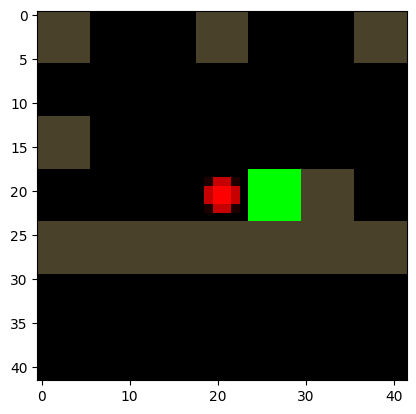

In [ ]:
# #| hide
# import matplotlib.pyplot as plt
# goal = metadata['rollout_0_goal_obs']
# normalize = lambda img: (img - img.min()) / (img.max() - img.min())
# goal = normalize(goal[0])
# plt.imshow(goal)    
# plt.show()

In [ ]:
# #| hide
# from datasets import load_from_disk, concatenate_datasets
# import glob
# paths = glob.glob("../datasets/marl_grid_data_hf/rollout_*")
# ds = concatenate_datasets([load_from_disk(p) for p in paths])


In [ ]:
# #| hide
# ds.save_to_disk("../datasets/marl_grid_data_hf/merged")

Saving the dataset (0/1 shards):   0%|          | 0/2513 [00:00<?, ? examples/s]

In [ ]:
# #| hide
# import gc
# del ds
# gc.collect()

49346

In [ ]:
# #| hide
# from datasets import load_from_disk
# ds = load_from_disk("../datasets/marl_grid_data_hf/merged_dataset")

In [ ]:
# #| hide
# ds = ds.with_format("numpy")

In [ ]:
# #| hide
# from collections import defaultdict

# episode_indices = defaultdict(list)
# for i in range(len(ds)):
#     episode_indices[ds[i]["rollout_idx"]].append(i)


In [ ]:
# #| hide
# for k, v in ds[0].items():
#     print(k, type(v), v.shape if hasattr(v, 'shape') else None)

agent_0_obs <class 'list'> None
agent_0_next_obs <class 'list'> None
agent_0_selfpos <class 'list'> None
agent_0_orientation <class 'int'> None
agent_0_sees_goal <class 'bool'> None
agent_0_act <class 'int'> None
agent_0_rew <class 'float'> None
agent_0_done <class 'bool'> None
agent_1_obs <class 'list'> None
agent_1_next_obs <class 'list'> None
agent_1_selfpos <class 'list'> None
agent_1_orientation <class 'int'> None
agent_1_sees_goal <class 'bool'> None
agent_1_act <class 'int'> None
agent_1_rew <class 'float'> None
agent_1_done <class 'bool'> None
transition_idx <class 'int'> None
rollout_idx <class 'int'> None


In [ ]:
# #| hide
# ds = ds.with_format("numpy")

In [ ]:
# #| hide
# for k, v in ds[0].items():
#     print(k, type(v), v.shape if hasattr(v, 'shape') else None)

agent_0_obs <class 'numpy.ndarray'> (42, 42, 3)
agent_0_next_obs <class 'numpy.ndarray'> (42, 42, 3)
agent_0_selfpos <class 'numpy.ndarray'> (2,)
agent_0_orientation <class 'numpy.int32'> ()
agent_0_sees_goal <class 'numpy.ndarray'> ()
agent_0_act <class 'numpy.int32'> ()
agent_0_rew <class 'numpy.float32'> ()
agent_0_done <class 'numpy.ndarray'> ()
agent_1_obs <class 'numpy.ndarray'> (42, 42, 3)
agent_1_next_obs <class 'numpy.ndarray'> (42, 42, 3)
agent_1_selfpos <class 'numpy.ndarray'> (2,)
agent_1_orientation <class 'numpy.int32'> ()
agent_1_sees_goal <class 'numpy.ndarray'> ()
agent_1_act <class 'numpy.int32'> ()
agent_1_rew <class 'numpy.float32'> ()
agent_1_done <class 'numpy.ndarray'> ()
transition_idx <class 'numpy.int32'> ()
rollout_idx <class 'numpy.int32'> ()


In [ ]:
# #| hide
# ds

Dataset({
    features: ['agent_0_obs', 'agent_0_next_obs', 'agent_0_selfpos', 'agent_0_orientation', 'agent_0_sees_goal', 'agent_0_act', 'agent_0_rew', 'agent_0_done', 'agent_1_obs', 'agent_1_next_obs', 'agent_1_selfpos', 'agent_1_orientation', 'agent_1_sees_goal', 'agent_1_act', 'agent_1_rew', 'agent_1_done', 'transition_idx', 'rollout_idx'],
    num_rows: 2513
})

In [ ]:
# #| hide
# ds[:500]['transition_idx'], ds[:500]['rollout_idx']

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

[4 2 3 4 3 1 1 0 3 1]


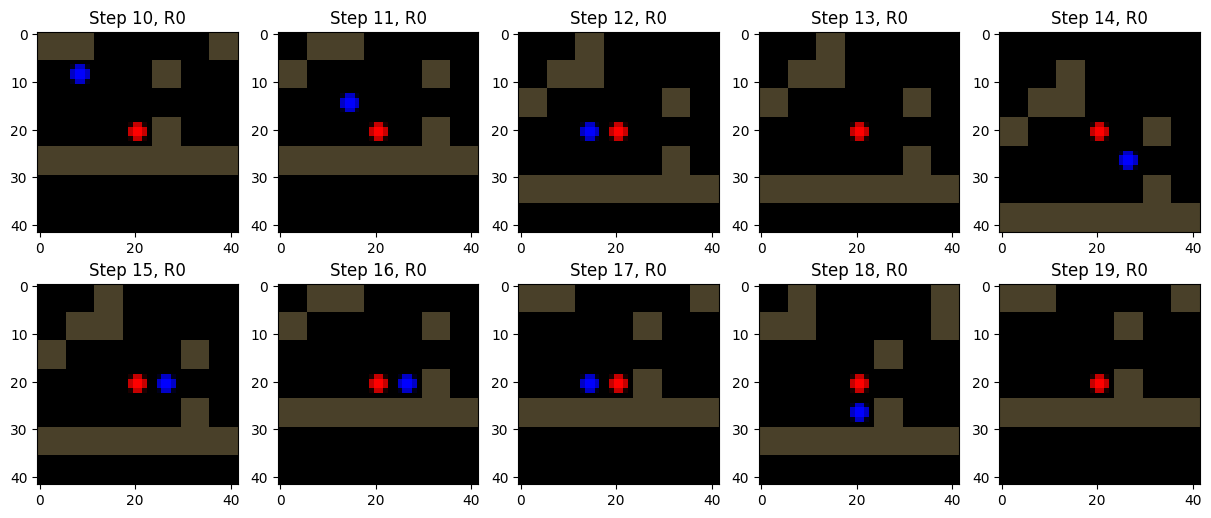

In [ ]:
# #| hide
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(2, 5, figsize=(15,6))
# normalize = lambda x: (x - x.min()) / (x.max() - x.min())
# for i in range(10, 20):
#     obs = ds[i]['agent_0_obs']
#     next_obs = ds[i]['agent_0_next_obs']
#     ax = axs[(i-10)//5, (i-10)%5]
#     ax.imshow(normalize(next_obs))
#     ax.set_title(f"Step {ds[i]['transition_idx']}, R{ds[i]['rollout_idx']}")
# print(ds[10:20]['agent_0_act'])
# plt.show()

['Down', 'Right', 'Done', 'Down', 'Up']


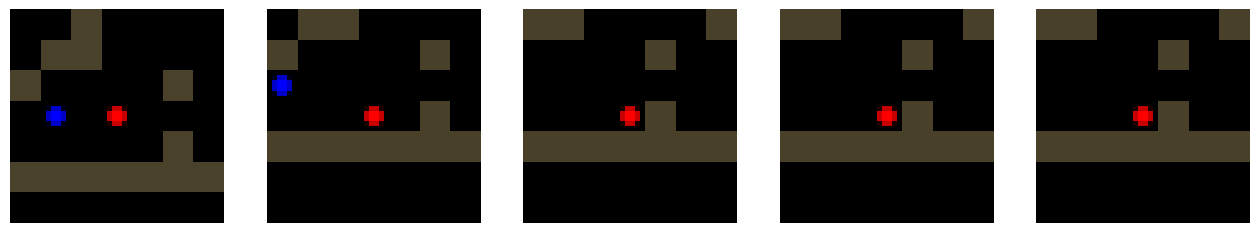

In [ ]:
# #| hide
# action_mapping = {
#     0: "Right",
#     1: "Down",
#     2: "Left",
#     3: "Up",
#     4: "Done",
#     }
# imgs = ds[:5]['agent_0_obs']
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 5, figsize=(16, 8))
# for i in range(5):
#     axs[i].imshow(normalize(imgs[i]))
#     axs[i].axis('off')
# plt.savefig('seq_imgs_agent0.png')
# print([action_mapping[act] for act in ds[:5]['agent_0_act']])
# plt.show()


### Iterable dataset loading test

In [ ]:
# #| hide
# from datasets import load_dataset
# data_files = {"train": "/home/ahmed/Ahmed-home/1- Projects/Research/Journal 2/Code/mawm/datasets/marl_grid_data_hf/merged/*"}
# my_iterable_dataset = load_dataset("arrow", data_files=data_files, split="train", streaming=True, features=ds.features)


In [ ]:
# #| hide
# my_iterable_dataset

IterableDataset({
    features: ['agent_0_obs', 'agent_0_selfpos', 'agent_0_orientation', 'agent_0_sees_goal', 'agent_0_act', 'agent_0_rew', 'agent_0_done', 'agent_1_obs', 'agent_1_selfpos', 'agent_1_orientation', 'agent_1_sees_goal', 'agent_1_act', 'agent_1_rew', 'agent_1_done', 'transition_idx', 'rollout_idx'],
    num_shards: 2
})

In [ ]:
# #| hide
# my_iterable_dataset = my_iterable_dataset.with_format("numpy")

In [ ]:
# #| hide
# for example in my_iterable_dataset:  # this reads the CSV file progressively as you iterate over the dataset
#     print(example)
#     break

{'agent_0_obs': array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [74., 65., 42.],
        [74., 65., 42.],
        [74., 65., 42.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [74., 65., 42.],
        [74., 65., 42.],
        [74., 65., 42.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [74., 65., 42.],
        [74., 65., 42.],
        [74., 65., 42.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        

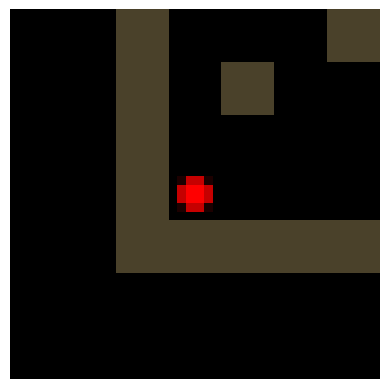

In [ ]:
# #| hide
# import matplotlib.pyplot as plt
# normalize = lambda x: (x - x.min()) / (x.max() - x.min())
# plt.imshow(normalize(example['agent_0_obs']))
# plt.axis('off')
# plt.show()

In [ ]:
# #| hide
# def normalize(img):
#     return (img - img.min()) / (img.max() - img.min())


In [ ]:
# #| hide
# action_mapping = {
#     0: "Right",
#     1: "Down",
#     2: "Left",
#     3: "Up",
#     4: "Done",
#     }

# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 5, figsize=(16, 8))
# for i in range(5):
#     axs[i].imshow(normalize(imgs[i]))
#     axs[i].axis('off')
# plt.savefig('seq_imgs_agent0.png')
# plt.show()


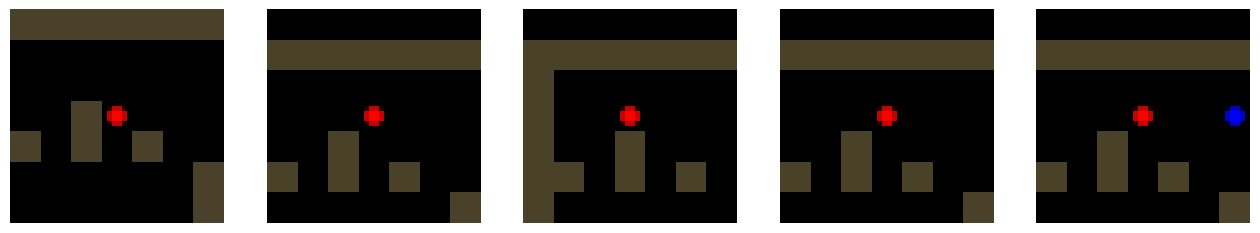

In [ ]:
# #| hide
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, 5, figsize=(16, 8))
# for i in range(5):
#     axs[i].imshow(normalize(imgs[i]))
#     axs[i].axis('off')
# plt.savefig('seq_imgs_agent0.png')
# plt.show()

In [ ]:
# #| hide
# import h5py
# goal_obs = metadata['global']['goal_obs'][0]
# layout = metadata['global']['layout']

In [ ]:
# #| hide
# import matplotlib.pyplot as plt
# plt.imshow(layout)
# plt.axis('off')
# plt.show()